<a href="https://colab.research.google.com/github/andrewolf80550/AA/blob/main/aviation_sms_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Cerebro IA entrenado y listo.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


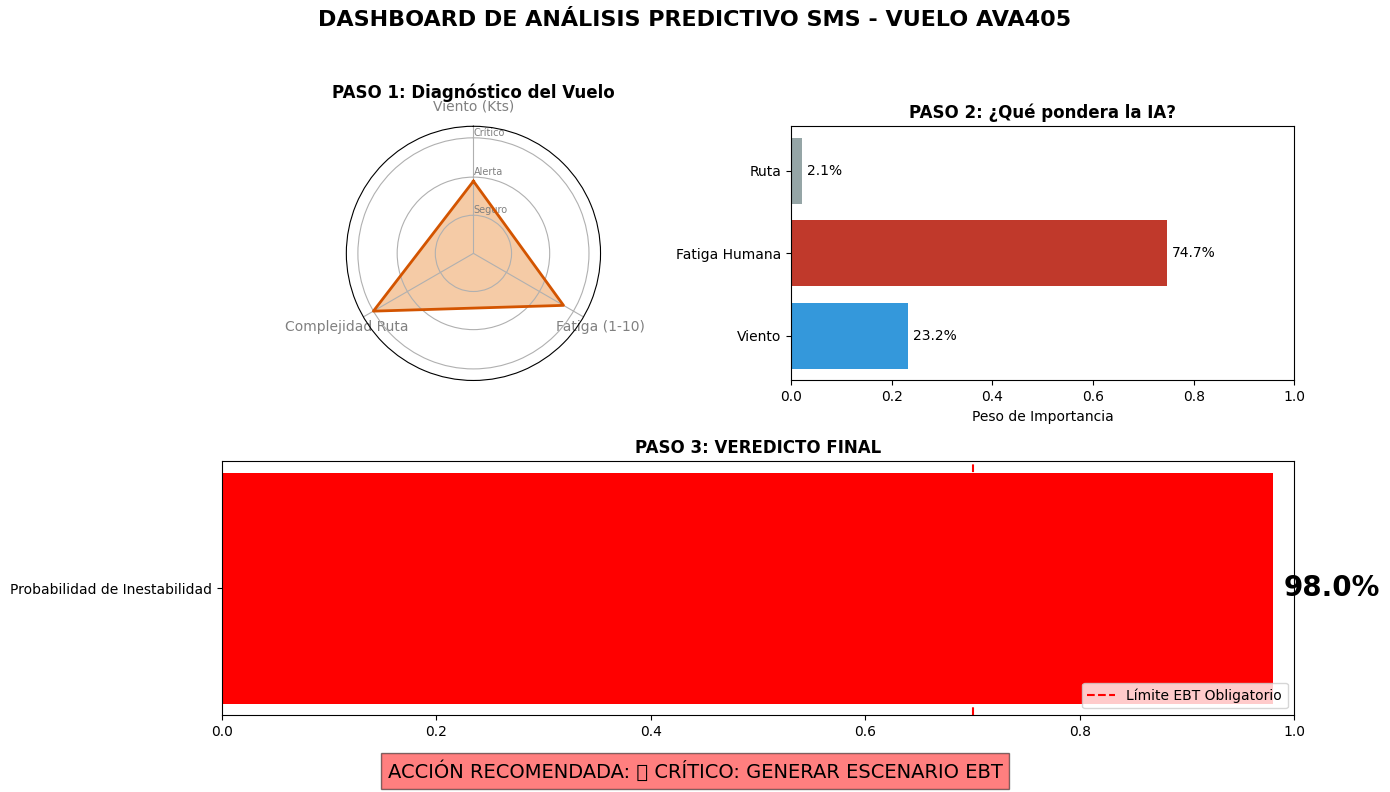

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from math import pi

# ==========================================
# 1. GENERADOR DE DATOS (MUNDO SIMULADO)
# ==========================================
def generar_datos_historicos(n=1000):
    np.random.seed(42)
    viento = np.random.normal(12, 5, n)
    fatiga = np.random.randint(1, 11, n)
    ruta_compleja = np.random.randint(0, 2, n)

    # Fórmula: La fatiga tiene un peso muy alto aquí
    probabilidad = (viento * 0.02) + (fatiga * 0.15) + (ruta_compleja * 0.2)
    target = [1 if p > 1.2 + np.random.normal(0, 0.1) else 0 for p in probabilidad]

    return pd.DataFrame({
        'Viento (kts)': viento,
        'Nivel Fatiga': fatiga,
        'Ruta Compleja': ruta_compleja,
        'Evento Inseguro': target
    })

# ==========================================
# 2. SISTEMA DE VISUALIZACIÓN AVANZADA
# ==========================================
class SafetyDashboard:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)

    def entrenar(self, df):
        X = df[['Viento (kts)', 'Nivel Fatiga', 'Ruta Compleja']]
        y = df['Evento Inseguro']
        self.model.fit(X, y)
        print("✅ Cerebro IA entrenado y listo.")

    def crear_radar_chart(self, ax, valores, maximos, titulo):
        # Configuración del gráfico de araña (Radar)
        categorias = ['Viento (Kts)', 'Fatiga (1-10)', 'Complejidad Ruta']
        N = len(categorias)

        # Normalizar valores para que quepan en el gráfico (escala 0 a 1)
        val_norm = [valores[0]/maximos[0], valores[1]/maximos[1], valores[2]/maximos[2]]
        val_norm += val_norm[:1] # Cerrar el círculo

        angulos = [n / float(N) * 2 * pi for n in range(N)]
        angulos += angulos[:1]

        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        plt.xticks(angulos[:-1], categorias, color='grey', size=10)
        ax.set_rlabel_position(0)
        plt.yticks([0.33, 0.66, 1.0], ["Seguro", "Alerta", "Crítico"], color="grey", size=7)
        plt.ylim(0, 1.1)

        # Dibujar datos
        ax.plot(angulos, val_norm, linewidth=2, linestyle='solid', color='#d35400')
        ax.fill(angulos, val_norm, '#e67e22', alpha=0.4)
        ax.set_title(titulo, pad=20, weight='bold')

    def visualizar_dashboard(self, vuelo_id, viento, fatiga, compleja):
        # 1. Predicción
        input_data = pd.DataFrame([[viento, fatiga, compleja]],
                                columns=['Viento (kts)', 'Nivel Fatiga', 'Ruta Compleja'])
        prob = self.model.predict_proba(input_data)[0][1]

        # 2. Configuración del Canvas (Lienzo)
        fig = plt.figure(figsize=(14, 8))
        fig.suptitle(f'DASHBOARD DE ANÁLISIS PREDICTIVO SMS - VUELO {vuelo_id}', fontsize=16, weight='bold')

        # --- PANEL 1: DIAGNÓSTICO DE ENTRADA (RADAR) ---
        ax1 = plt.subplot(221, polar=True)
        # Valores máximos referenciales: Viento 40kts, Fatiga 10, Ruta 1
        self.crear_radar_chart(ax1, [viento, fatiga, compleja], [40, 10, 1], "PASO 1: Diagnóstico del Vuelo")

        # --- PANEL 2: EL CEREBRO DE LA IA (BARRAS) ---
        ax2 = plt.subplot(222)
        importancias = self.model.feature_importances_
        cols = ['Viento', 'Fatiga Humana', 'Ruta']
        barras = ax2.barh(cols, importancias, color=['#3498db', '#c0392b', '#95a5a6'])
        ax2.set_xlim(0, 1)
        ax2.set_title("PASO 2: ¿Qué pondera la IA?", weight='bold')
        ax2.set_xlabel("Peso de Importancia")

        # Añadir etiquetas de porcentaje
        for rect in barras:
            width = rect.get_width()
            ax2.text(width + 0.01, rect.get_y() + rect.get_height()/2,
                     f'{width:.1%}', ha='left', va='center', color='black')

        # --- PANEL 3: EL VEREDICTO (MEDIDOR DE RIESGO) ---
        ax3 = plt.subplot(212)
        color_final = 'green' if prob < 0.3 else 'orange' if prob < 0.7 else 'red'

        # Crear barra de progreso visual
        ax3.barh(['Probabilidad de Inestabilidad'], [prob], color=color_final, height=0.3)
        ax3.set_xlim(0, 1)
        ax3.axvline(x=0.7, color='red', linestyle='--', label='Límite EBT Obligatorio')

        # Texto gigante del resultado
        ax3.text(prob + 0.01, 0, f"{prob:.1%}", fontsize=20, weight='bold', va='center')

        ax3.set_title("PASO 3: VEREDICTO FINAL", weight='bold')
        ax3.legend(loc='lower right')

        # Mensaje de Acción
        accion = "✅ VUELO SEGURO"
        if prob > 0.4: accion = "⚠️ ALERTA: MONITOREAR"
        if prob > 0.7: accion = "🚨 CRÍTICO: GENERAR ESCENARIO EBT"

        plt.figtext(0.5, 0.02, f"ACCIÓN RECOMENDADA: {accion}", ha="center", fontsize=14,
                    bbox={"facecolor":color_final, "alpha":0.5, "pad":5})

        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.show()

        return prob

# ==========================================
# 3. EJECUCIÓN CON TUS DATOS
# ==========================================

# A. Entrenar
df = generar_datos_historicos()
sistema = SafetyDashboard()
sistema.entrenar(df)

# B. SIMULACIÓN (MODIFICA ESTOS VALORES)
VUELO_ID = "AVA405"
VIENTO_ACTUAL = 25    # Nudos
FATIGA_PILOTO = 9     # Escala 1-10
RUTA_DIFICIL = 1      # 1 = Sí, 0 = No

risk = sistema.visualizar_dashboard(VUELO_ID, VIENTO_ACTUAL, FATIGA_PILOTO, RUTA_DIFICIL)

Paso 1 (Arriba Izquierda - El Triángulo/Radar):

Muestra la "Huella digital" del vuelo.

Si el triángulo naranja es pequeño y está en el centro, todo está bien.

En tu ejemplo (Viento 25, Fatiga 9), verás que el triángulo se estira muchísimo hacia "Fatiga" y "Viento", saliéndose de la zona segura. Visualmente grita: "Aquí está el problema".

Paso 2 (Arriba Derecha - Barras Azules y Rojas):

Es la explicación de la "Caja Negra".

Le dice al usuario: "Ojo, para este modelo, la Fatiga (barra roja) es mucho más peligrosa que la Ruta (barra gris)". Esto justifica por qué el sistema toma las decisiones que toma.

Paso 3 (Abajo - La Barra de Riesgo):

Es el resultado final.

Si pasa la línea punteada roja, verás abajo un cartel grande que dice: 🚨 CRÍTICO: GENERAR ESCENARIO EBT.